In [1]:
import pandas as pd
import os
dir_path = os.path.abspath('')
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import math
from scipy import stats

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
#code to format titles for the graphs to contain info on consumption, generation, use
def id_title(id, description):
    title = id + "(C,"
    if(not np.isnan(description.loc[id]['Production (kW)']) and description.loc[id]['Production (kW)']>0.0): title = title + "P,"
     
    title = title + str(description.loc[id]['Type'])

    return(title + ")")
    
    

In [10]:
#list of smart meter names:
meters = open(dir_path+"/smart_meters.txt")
all_meter_data = pd.DataFrame()

for meter in meters:
    file_path = dir_path + '/in_SQL/active/' + str(meter[:-1]) + '.txt'
    df = pd.read_csv(file_path, header=None, names=['timestamp', 'tagname', 'energy', 'quality', 'qualityDetail', 'OPCquality'])
    #reformating timestamps to python datetimes
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    #creating column with the meter ID:
    df['id'] = meter[:-1]
    #setting a datetime index:
    df = df.set_index('timestamp')

    #selecting Energy from generation and multiplying it by -1.
    tag_for_id='Energy_Ameno_2_8_0_' + meter[:-1] + '.kWh'
    generation = df[df.tagname==tag_for_id]
    generation['energy'] = generation['energy'] * -1
    df.update(generation)

    #resample data in 1 hour intervals
    df = df.resample('60min').agg({'energy':np.sum, 'quality':np.max, 'qualityDetail':np.sum, 'OPCquality':np.min})
    #create new column to indicate if there was any data during this 1 hour interval
    df['isnull'] = df['quality'].isnull()    
    df['id'] = meter[:-1]

    #resetting the index (not datetime index, so that in the dataframe with all the smart meters every index is unique)
    df = df.reset_index()
    
    all_meter_data = pd.concat([all_meter_data,df])



all_meter_data['timestamp'] = pd.to_datetime(all_meter_data['timestamp'])
all_meter_data.reset_index()
all_meter_data = all_meter_data[all_meter_data.timestamp >= '2021-09-01 00:00:00']
all_meter_data


timestamp energy quality qualityDetail OPCquality  isnull  \
32136 2021-09-01 00:00:00    0.0     NaN           0.0        NaN    True   
32137 2021-09-01 01:00:00    0.0     NaN           0.0        NaN    True   
32138 2021-09-01 02:00:00    0.0     NaN           0.0        NaN    True   
32139 2021-09-01 03:00:00    0.0     NaN           0.0        NaN    True   
32140 2021-09-01 04:00:00    0.0     NaN           0.0        NaN    True   
...                   ...    ...     ...           ...        ...     ...   
39368 2022-06-29 08:00:00    0.0     NaN           0.0        NaN    True   
39369 2022-06-29 09:00:00    0.0     NaN           0.0        NaN    True   
39370 2022-06-29 10:00:00    0.0     NaN           0.0        NaN    True   
39371 2022-06-29 11:00:00    0.0     NaN           0.0        NaN    True   
39372 2022-06-29 12:00:00    0.0     1.0          48.0       24.0   False   

            id  
32136  BBB6004  
32137  BBB6004  
32138  BBB6004  
32139  BBB6004  
32140  BBB6004  
...        ...  
39368  BBB6198  
39369  BBB6198  
39370  BBB6198  
39371  BBB6198  
39372  BBB6198  

[369085 rows x 7 columns]

In [4]:
#creating a dictionary with a dataframe for each ID:
IDs = pd.unique(all_meter_data['id'])
dict = {}
for id in IDs:
    df = all_meter_data[all_meter_data['id']==id]
    df.index = df.timestamp
    dict[id] = df

meter_description = pd.read_csv(dir_path+'/smart_meter_description.csv', sep=';', engine='python')

meter_description.index = meter_description.ID
meter_description


ID  Contractual power (kW)  Production (kW)  \
ID                                                          
BBB6004  BBB6004                    40.0             10.8   
BBB6007  BBB6007                     NaN              NaN   
BBB6017  BBB6017                     1.5             31.0   
BBB6018  BBB6018                   137.0            155.0   
BBB6020  BBB6020                   100.0              0.0   
BBB6021  BBB6021                    35.0             50.0   
BBB6022  BBB6022                    95.0              0.0   
BBB6025  BBB6025                     7.7             19.3   
BBB6028  BBB6028                   125.0              0.0   
BBB6029  BBB6029                    60.0              0.0   
BBB6030  BBB6030                   150.0              0.0   
BBB6032  BBB6032                   165.0              0.0   
BBB6036  BBB6036                    19.3              NaN   
BBB6040  BBB6040                    51.0             34.6   
BBB6048  BBB6048                    30.0             49.9   
BBB6050  BBB6050                   100.0              0.0   
BBB6051  BBB6051                    35.0             34.7   
BBB6052  BBB6052                     1.5             89.9   
BBB6055  BBB6055                     1.5            175.5   
BBB6061  BBB6061                    80.0              0.0   
BBB6062  BBB6062                    46.0             49.3   
BBB6063  BBB6063                   100.0              0.0   
BBB6064  BBB6064                   200.0              0.0   
BBB6065  BBB6065                   125.0              0.0   
BBB6067  BBB6067                    70.0              0.0   
BBB6071  BBB6071                     NaN              NaN   
BBB6074  BBB6074                    33.0             49.0   
BBB6078  BBB6078                    76.0             50.0   
BBB6086  BBB6086                     NaN              NaN   
BBB6087  BBB6087                   100.0              0.0   
BBB6097  BBB6097                    70.0            108.2   
BBB6100  BBB6100                     NaN              NaN   
BBB6103  BBB6103                    22.0              0.0   
BBB6105  BBB6105                    22.0              0.0   
BBB6133  BBB6133                     NaN              NaN   
BBB6140  BBB6140                     NaN              NaN   
BBB6168  BBB6168                     3.0              0.0   
BBB6169  BBB6169                     3.0              0.0   
BBB6170  BBB6170                     3.0              0.0   
BBB6171  BBB6171                     3.0              0.0   
BBB6173  BBB6173                     3.0              0.0   
BBB6177  BBB6177                     3.0              0.0   
BBB6178  BBB6178                     3.0              0.0   
BBB6179  BBB6179                     3.0              0.0   
BBB6180  BBB6180                     3.0              0.0   
BBB6181  BBB6181                     3.0              0.0   
BBB6182  BBB6182                     3.0              0.0   
BBB6183  BBB6183                     3.0              0.0   
BBB6186  BBB6186                     3.0              0.0   
BBB6190  BBB6190                     3.0              0.0   
BBB6191  BBB6191                     3.0              0.0   
BBB6192  BBB6192                     3.0              0.0   
BBB6197  BBB6197                     3.0              0.0   
BBB6198  BBB6198                     3.0              0.0   

                                      Type  
ID                                          
BBB6004                                NaN  
BBB6007                               pump  
BBB6017                            company  
BBB6018                            company  
BBB6020                         university  
BBB6021                            company  
BBB6022                               Pump  
BBB6025                            company  
BBB6028                               pool  
BBB6029                            company  
BBB6030                            company  
BBB6032     

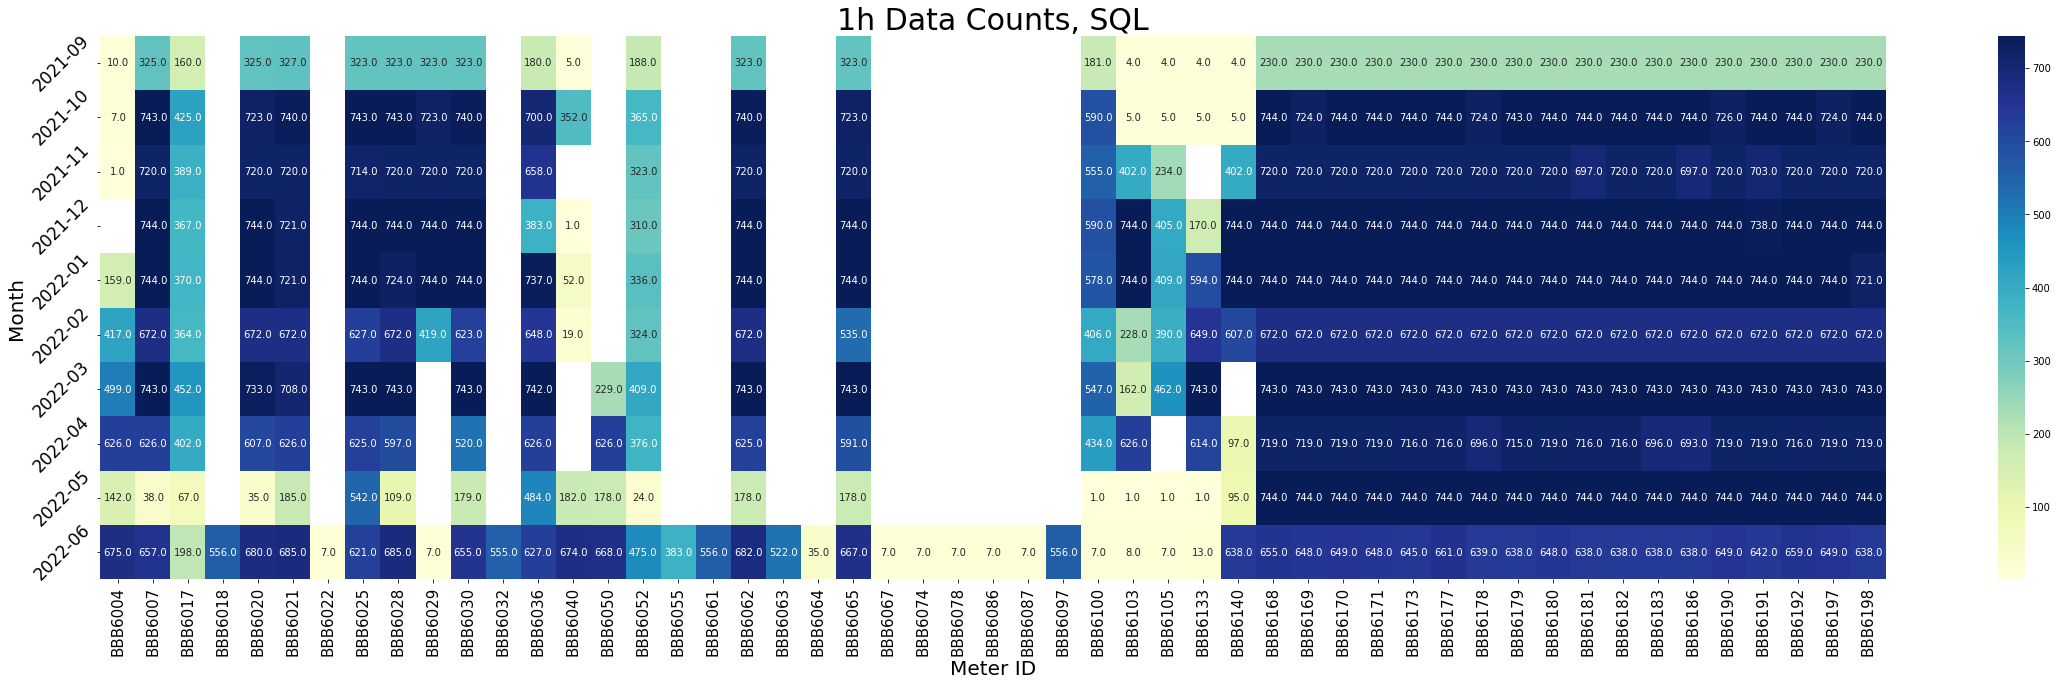

In [14]:
#filtering out all the null values:
df = all_meter_data[all_meter_data['isnull'] == False]

month_year = df['timestamp'].groupby([df.timestamp.dt.to_period('M'), df.id]).agg('count').unstack()

figure, ax = plt.subplots(1, 1, figsize=(40,10))
ax.set_title("1h Data Counts, SQL", fontsize=30)

ax = sns.heatmap(month_year, annot=True, cmap="YlGnBu", fmt='.1f')
plt.yticks(rotation=45, fontsize=17)
plt.ylabel('Month', fontsize=20)
plt.xticks(fontsize=15)
plt.xlabel('Meter ID', fontsize=20)
plt.show()

figure.savefig(dir_path+'/plots&graphs/SQL_15mDataCount.png')
figure.savefig('/users/angelospipergias/Desktop/figuresForPaper/1h Data Counts, SQL', dpi=300)

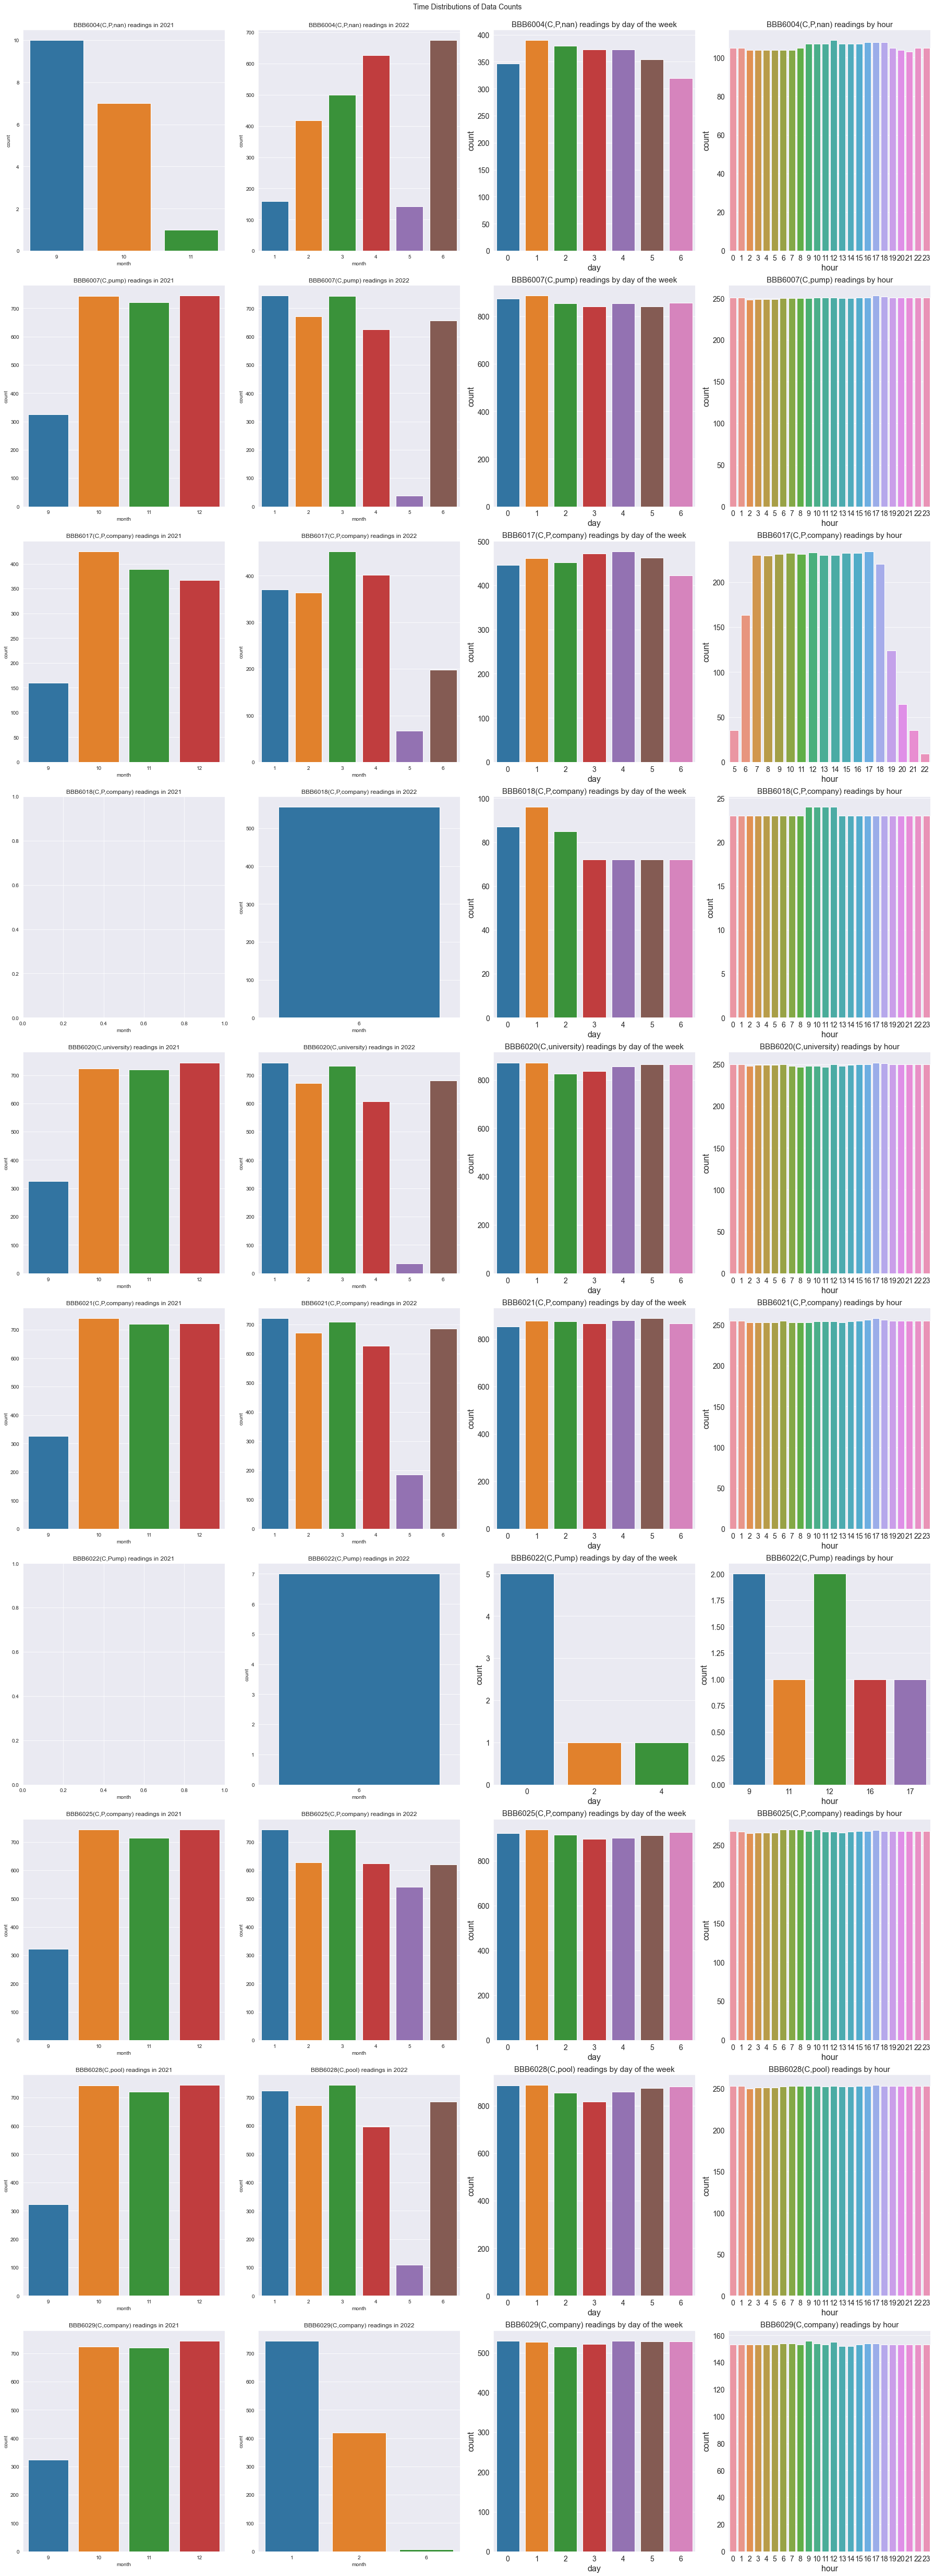

In [26]:
#filtering out all the null values:
df1 = all_meter_data[all_meter_data['isnull'] == False]

meters = all_meter_data['id'].unique()
figure, axis = plt.subplots(10, 4, figsize=(25,10*7))
i = 0
for meter in meters[:10]:
    df = df1[df1.id == meter]
    for2021 = df[df.timestamp.dt.year==2021]
    for2022 = df[df.timestamp.dt.year==2022]

    sns.set_style("darkgrid")

    if(not for2021.empty):
        sns.countplot(for2021.timestamp.dt.month, ax=axis[i][0])
    sns.countplot(for2022.timestamp.dt.month, ax=axis[i][1])

    axis[i][0].set_title(id_title(meter, meter_description) + " readings in 2021")
    axis[i][1].set_title(id_title(meter, meter_description) + " readings in 2022")

    axis[i][0].set_xlabel("month")
    axis[i][1].set_xlabel("month")

    sns.countplot(df.timestamp.dt.day_of_week, ax=axis[i][2])
    sns.countplot(df.timestamp.dt.hour, ax=axis[i][3])

    axis[i][2].set_title(id_title(meter, meter_description) + " readings by day of the week", fontsize=15)
    axis[i][3].set_title(id_title(meter, meter_description) + " readings by hour", fontsize=15)

    axis[i][2].set_xlabel("day", fontsize=16)
    axis[i][3].set_xlabel("hour", fontsize=16)
    axis[i][2].set_ylabel('count', fontsize=16)
    axis[i][3].set_ylabel('count', fontsize=16)
    axis[i][2].tick_params(axis='both', which='major', labelsize=14)
    axis[i][3].tick_params(axis='both', which='major', labelsize=14)


    i = i+1

figure.tight_layout()
figure.subplots_adjust(top=0.97)
figure.suptitle('Time Distributions of Data Counts', fontsize=14)
figure.savefig(dir_path+'/plots&graphs/SQL_TimeDistr.png')
figure.savefig('/users/angelospipergias/Desktop/figuresForPaper/Picture3.png', dpi=300)

Observations:
1. Unlike in the Mongo database, the months of the year for which we have available data are consistent between smart meters.
2. For smart meters 6021, 6036, 6062, 6100, we have fewer data available in the 08:00 to 17:00h time interval. -> fixed for all except 6100 by including data from the Emeno tagname (negative energy)
3. For smart meters 6017 and 6052 we don't have data for all hours of the days. Most notably, we have no data at all for the hours of the early morning (00:00h to 06:00h)

In [28]:
#for smart meters BBB6017, BBB6052, that had not data during the night, make energy during the night = 0
for id in ['BBB6017', 'BBB6052']:
    meter = dict[id]
    meter['hour'] = meter.index.hour
    null_in_the_night = meter[meter['isnull']==True][meter['hour'].isin([0,1,2,3,4,5,6,7,18,19,20,21,22,23])]
    null_in_the_night['energy'] = 0.0
    null_in_the_night['isnull'] = False
    meter.update(null_in_the_night)
    dict[id] = meter

#for smart meter BBB6100, for which we had no data during the day when there was more generation than production
#we make energy during those periods = 0
meter = dict['BBB6100']
meter['hour'] = meter.index.hour
null_generation = meter[meter['isnull']==True][meter['hour'].isin([6,7,8,9,10,11,12,13,14,15,16,17,18,19])]
null_generation['energy'] = 0.0
null_generation['isnull'] = False
meter.update(null_generation)
dict['BBB6100'] = meter

    


fdfdf

In [29]:
def reject_outliers(meter_data, contractual_power, contractual_production):
    one_meter = meter_data
    if(math.isnan(contractual_power) or contractual_power==0): contractual_power = 200.0    
    if(math.isnan(contractual_production)): contractual_production = 200.0

    one_meter['consecutive_null_shift'] = one_meter.shift(1)['consecutive_null']
    one_meter.loc[one_meter['consecutive_null_shift']==0, 'consecutive_null_shift'] = 1.0

    one_meter.loc[one_meter['energy']>one_meter['consecutive_null_shift']*contractual_power*1000/4, 'isnull'] = True
    one_meter.loc[one_meter['energy']>one_meter['consecutive_null_shift']*contractual_power*1000/4, 'energy'] = 0.0
    one_meter.loc[one_meter['energy']<one_meter['consecutive_null_shift']*contractual_production*1000*(-1)/4, 'isnull'] = True
    one_meter.loc[one_meter['energy']<one_meter['consecutive_null_shift']*contractual_production*1000*(-1)/4, 'energy'] = 0.0
    
    return(one_meter)

def fill_missing_periods(meter_data, filling_window: int, fill_night: bool):
    one_meter = meter_data
    #creating Total Energy field for the energy(Wh) field so that it can be used for interpolation, to fill in missing data:
    one_meter['Total_Energy'] = one_meter['energy'].cumsum()
    one_meter['Total_Energy'] = pd.to_numeric(one_meter['Total_Energy'])
    one_meter['Total_Energy'] = one_meter['Total_Energy'].interpolate()
    one_meter['energy'] = one_meter['Total_Energy'].diff()

    if(fill_night):
        #impute every null value that is in the 00:00h to 00:06h interval and has consecutive_null < 24 using energy_difference 
        one_meter['hour'] = one_meter.index.hour
        missing_night = one_meter[one_meter['consecutive_null'].between(1,24)][one_meter['hour'].isin([0,1,2,3,4,5,6])]
        missing_night['isnull'] =  False
        one_meter.update(missing_night)
    
    #impute every null value that isn't more than (filling_window) hours away from the last real value using energy_difference
    missing_lessthan_window = one_meter[one_meter['consecutive_null'].isin([1, filling_window*4])]
    missing_lessthan_window['isnull'] =  False
    one_meter.update(missing_lessthan_window)

    return(one_meter)

def only_full_days(meter_data):
    one_meter = meter_data 
    one_meter['date'] = one_meter.index.date
    one_meter['time'] = one_meter.index.time
    full_days = one_meter.pivot(index='date', columns ='time', values='isnull')
    full_days = full_days.loc[~full_days[full_days.columns].any(True)]
    one_meter = one_meter[one_meter['date'].isin(full_days.index)]
    return(one_meter)

    
    
    

energy
timestamp                      
2022-01-26 00:00:00  761.026428
2022-01-26 00:15:00  855.874930
2022-01-26 00:30:00  855.694988
2022-01-26 00:45:00  975.686249
2022-01-26 01:00:00  957.455466
...                         ...
2022-06-26 22:45:00    6.366000
2022-06-26 23:00:00    3.266000
2022-06-26 23:15:00    0.480000
2022-06-26 23:30:00    3.215000
2022-06-26 23:45:00    3.551000

[733404 rows x 1 columns]

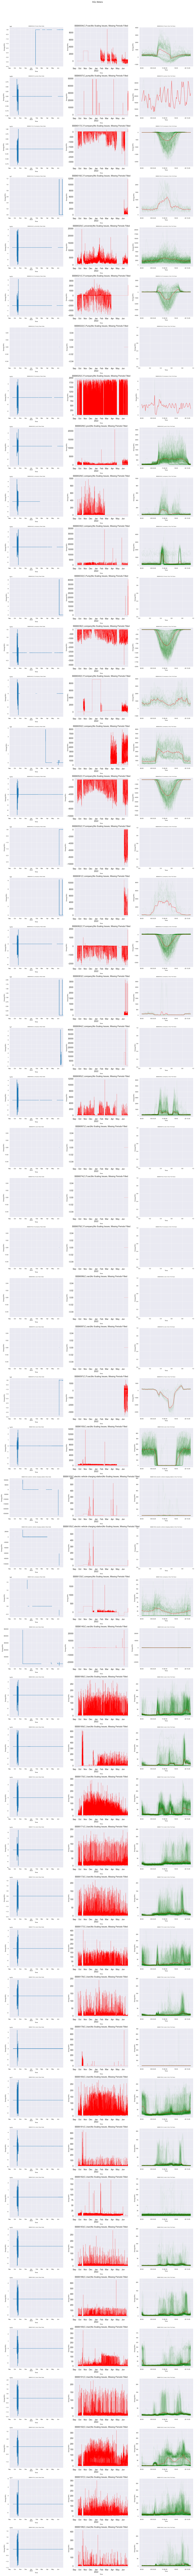

In [36]:
IDs = pd.unique(all_meter_data['id'])
fig, ax = plt.subplots(len(IDs), 3, figsize=(19,len(IDs)*5))
i=0

matplotlib.rcParams.update({'axes.titlesize': 'small'})

to_export = pd.DataFrame()


for id in IDs:
    one_meter = dict[id].copy()

    one_meter.loc[one_meter['isnull']==True, 'energy'] = np.nan
    one_meter['consecutive_null'] = one_meter['energy'].isnull().astype(int).groupby(one_meter['energy'].notnull().astype(int).cumsum()).cumsum()

    #plots
    one_meter['energy'].plot(ax = ax[i][0])
    ax[i][0].set_title(id_title(id,meter_description) + " Raw Data")
    ax[i][0].set_ylabel("Energy(Wh)")
    ax[i][0].set_xlabel("Time")

    #dealing with outliers:
    power = meter_description.loc[id]['Contractual power (kW)']  
    production = meter_description.loc[id]['Production (kW)']
    one_meter = reject_outliers(one_meter, power, production)

    #filling missing periods:
    one_meter = fill_missing_periods(one_meter, filling_window=2, fill_night=True)

    #plots:
    one_meter['energy'].plot(ax = ax[i][1], color='red', linewidth=0.4)
    ax[i][1].set_ylabel("Energy(Wh)")
    ax[i][1].set_xlabel("Time")
    ax[i][1].set_title(id_title(id,meter_description) + "No Scaling Issues, Missing Periods Filled", fontsize=14)
    ax[i][1].tick_params(labelsize=14)

    #now select all days that have no null values after imputation
    one_meter = only_full_days(one_meter)
    

    #exporting to CSV:
    one_meter = one_meter[['energy']]
    head, tail = os.path.split(dir_path)
    one_meter.to_csv(head + '/2_Clustering/in_CSV/SQL/' + id + 'SQL.csv')

    to_export = pd.concat([to_export,one_meter])


    #some extra plots:
    df_pivot = one_meter.copy()
    df_pivot['date'] = df_pivot.index.date
    df_pivot['time'] = df_pivot.index.time
    df_pivot = df_pivot.pivot(index='time', columns='date', values='energy')
    mean_consumption = df_pivot.T.mean()
    if(not df_pivot.empty):
        df_pivot.plot(legend=False, color='green', alpha=0.05, ax = ax[i][2])
        mean_consumption.plot(ax=ax[i][2], color = 'red', ls='--')

    ax[i][2].set_ylabel("Energy(Wh)")
    ax[i][2].set_xlabel("Time")
    ax[i][2].set_title(id_title(id,meter_description) + " Only Full Days")


    i = i+1

fig.tight_layout()
fig.subplots_adjust(top=0.97)
fig.suptitle('SQL Meters', fontsize=14)
#fig.savefig(dir_path+'/plots&graphs/SQL_general_graphs', dpi=300)
fig.savefig('/users/angelospipergias/Desktop/figuresForPaper/Picture4.png', dpi=200)

to_export